In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from sklearn.preprocessing import OrdinalEncoder
from path import Path
import lux

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
dd = pd.read_excel('FL_PND30Striatum_summary_nomacro.xls', index_col=0)

In [4]:
dd.iloc[6:10,:]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df = dd.iloc[6:60].copy()
df.drop(df.columns[[36,37,50,51,52,53]],axis=1,inplace=True)

In [6]:
df.index.name = None

In [7]:
df.iloc[:,1:4]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
df.shape

(54, 48)

In [9]:
df_transpose = df.T
df_transpose

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
subjects = ['#4 PND 3D Striatum C20Female F2S Control','#5 PND 3D Striatum C21FemaleF2S Control','#6 PND 3D Striatum C11FemaleF2S Control','#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin','#11 PND 3D Striatum T33FemaleF1S Deltamethrin','#12 PND 3D Striatum T34FemaleF1S Deltamethrin']
subjects_column = list(itertools.chain(*zip(subjects,subjects,subjects,subjects)))*2
subjects_column

['#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#4 PND 3D Striatum C20Female F2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#5 PND 3D Striatum C21FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#6 PND 3D Striatum C11FemaleF2S Control',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#10 PND 3D Striatum T20FemaleT20F2S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#11 PND 3D Striatum T33FemaleF1S Deltamethrin',
 '#12 PND 3D Striatum T34FemaleF1S Deltamethrin',
 '#12 

In [23]:
#df_transpose.reset_index(inplace=True, drop=True)

In [12]:
df_transpose.insert(0,'Subject',subjects_column,True)

In [13]:
df_transpose

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
# df_transpose = df_transpose.set_index('Subject')
# df_transpose

In [15]:
a = range(24)
first_block = ['Measured [metabolites/ IS] Ratio']*24
second_block = ['Concentration in sample [pmole/1mg protein]']*24
results_type_column = first_block + second_block
results_type_column

['Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Measured [metabolites/ IS] Ratio',
 'Concentration in sample [pmole/1mg protein]',
 'Concentration in sample [pmole/1mg protein]',
 'Concentration 

In [16]:
df_transpose.insert(1,'Measurements_types',results_type_column,True)
df_transpose

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
control_treated = ['Control']*12 + ['Deltamethrin']*12 + ['Control']*12 + ['Deltamethrin']*12
control_treated

['Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin',
 'Deltamethrin']

In [18]:
df_transpose.insert(1,'Control/Treated',control_treated,True)
df_transpose

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
df_transpose.set_index(['Subject','Control/Treated','Measurements_types'], inplace=True)

In [20]:
df_transpose

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
df_transpose = df_transpose[df_transpose.columns].apply(pd.to_numeric)

In [34]:
df_transpose_temp = df_transpose[df_transpose.index.get_level_values('Measurements_types').isin(['Measured [metabolites/ IS] Ratio'])]
df_transpose_temp

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
df_transpose_temp_no_index = df_transpose_temp.reset_index()
df_transpose_temp_no_index

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [36]:
df_to_export = df_transpose_temp.reset_index()
df_to_export.to_csv('FL_PND30Striatum_Females_MIR.csv',index=False)

In [37]:
df_transpose_temp_CIS = df_transpose[df_transpose.index.get_level_values('Measurements_types').isin(['Concentration in sample [pmole/1mg protein]'])]
df_to_export = df_transpose_temp_CIS.reset_index()
df_to_export.to_csv('FL_PND30Striatum_Females_CIS.csv',index=False)

In [344]:
df_transpose_temp.loc[:,'Control',:].describe()

,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,Aspartyl-b-phosphate-98a,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.028358,0.007422,0.001179,0.001180,0.809760,0.092239,0.049515,1.071517,0.002249,0.002247,...,0.360954,0.430665,0.552496,0.031682,0.001064,3.764457,0.203039,0.009407,0.060947,0.058924
std,0.009082,0.001592,0.000685,0.000686,0.186201,0.026090,0.016784,0.174209,0.001261,0.001260,...,0.130279,0.120332,0.159439,0.008103,0.000477,1.197958,0.060677,0.004006,0.024558,0.023508
min,0.010290,0.004812,0.000244,0.000244,0.532760,0.053238,0.028784,0.812230,0.000496,0.000495,...,0.188012,0.249705,0.344967,0.017801,0.000330,2.529207,0.117447,0.003990,0.039459,0.027821
25%,0.023341,0.006673,0.000717,0.000717,0.587417,0.068214,0.031801,0.879043,0.000582,0.000580,...,0.210114,0.279332,0.353536,0.024323,0.000502,2.719459,0.124663,0.004278,0.043966,0.031530
50%,0.027608,0.007595,0.001023,0.001024,0.919113,0.095180,0.048647,1.122851,0.002956,0.002952,...,0.379561,0.503922,0.587702,0.034067,0.001295,3.321025,0.236803,0.010894,0.047129,0.061954
75%,0.032340,0.008316,0.001882,0.001883,0.944261,0.117954,0.068469,1.183059,0.003091,0.003088,...,0.491867,0.516258,0.716827,0.037958,0.001425,5.252975,0.244227,0.012622,0.091155,0.083034
max,0.042181,0.009607,0.002166,0.002167,0.967541,0.125095,0.071579,1.308719,0.003416,0.003414,...,0.525931,0.540456,0.722157,0.041244,0.001530,5.496932,0.256568,0.013925,0.097331,0.086673


In [345]:
df_transpose_temp.loc[:,'Deltamethrin',:].describe()

,5-aminolevulinic_acid,5-hydroxy_Try,Acetyl-Ornithine,Ac-Taurine,Alpha-Alanine,Arg,Asn,Asp,Aspartyl-b-phosphate-98,Aspartyl-b-phosphate-98a,...,Pro,Ribosylamine,Ser,Spermidine,synephine,Taurine,The,Try,Tyr-NO2,Val
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.044169,0.007456,0.003443,0.003445,1.140743,0.099101,0.068991,1.492802,0.003566,0.003562,...,0.683428,0.574326,0.824551,0.052513,0.000911,6.192180,0.362253,0.016424,0.086038,0.094175
std,0.001332,0.000913,0.000543,0.000544,0.094688,0.010221,0.005679,0.083905,0.000586,0.000585,...,0.146762,0.039592,0.077795,0.006691,0.000154,0.112728,0.055872,0.003399,0.021819,0.014759
min,0.041762,0.006091,0.002735,0.002736,1.054106,0.087313,0.059645,1.370272,0.002662,0.002660,...,0.545845,0.533524,0.746526,0.041124,0.000589,6.037993,0.298642,0.013316,0.058709,0.078252
25%,0.043359,0.006990,0.002912,0.002912,1.062798,0.089708,0.064770,1.406788,0.003223,0.003216,...,0.570618,0.547153,0.760067,0.048700,0.000819,6.105987,0.304137,0.014120,0.066315,0.083592
50%,0.044167,0.007324,0.003446,0.003447,1.104867,0.099263,0.069884,1.513709,0.003396,0.003394,...,0.612518,0.551502,0.792018,0.051545,0.000912,6.184603,0.355475,0.014469,0.081732,0.087329
75%,0.045133,0.007885,0.003839,0.003841,1.231097,0.103621,0.072703,1.551165,0.003786,0.003780,...,0.844903,0.619241,0.915501,0.057374,0.001027,6.267143,0.410193,0.020530,0.109776,0.108182
max,0.046271,0.008823,0.004220,0.004223,1.293989,0.116019,0.078945,1.606036,0.004793,0.004789,...,0.909091,0.637332,0.943124,0.062939,0.001112,6.392471,0.458842,0.021894,0.114994,0.116969


Control              AxesSubplot(0.1,0.15;0.363636x0.75)
Deltamethrin    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

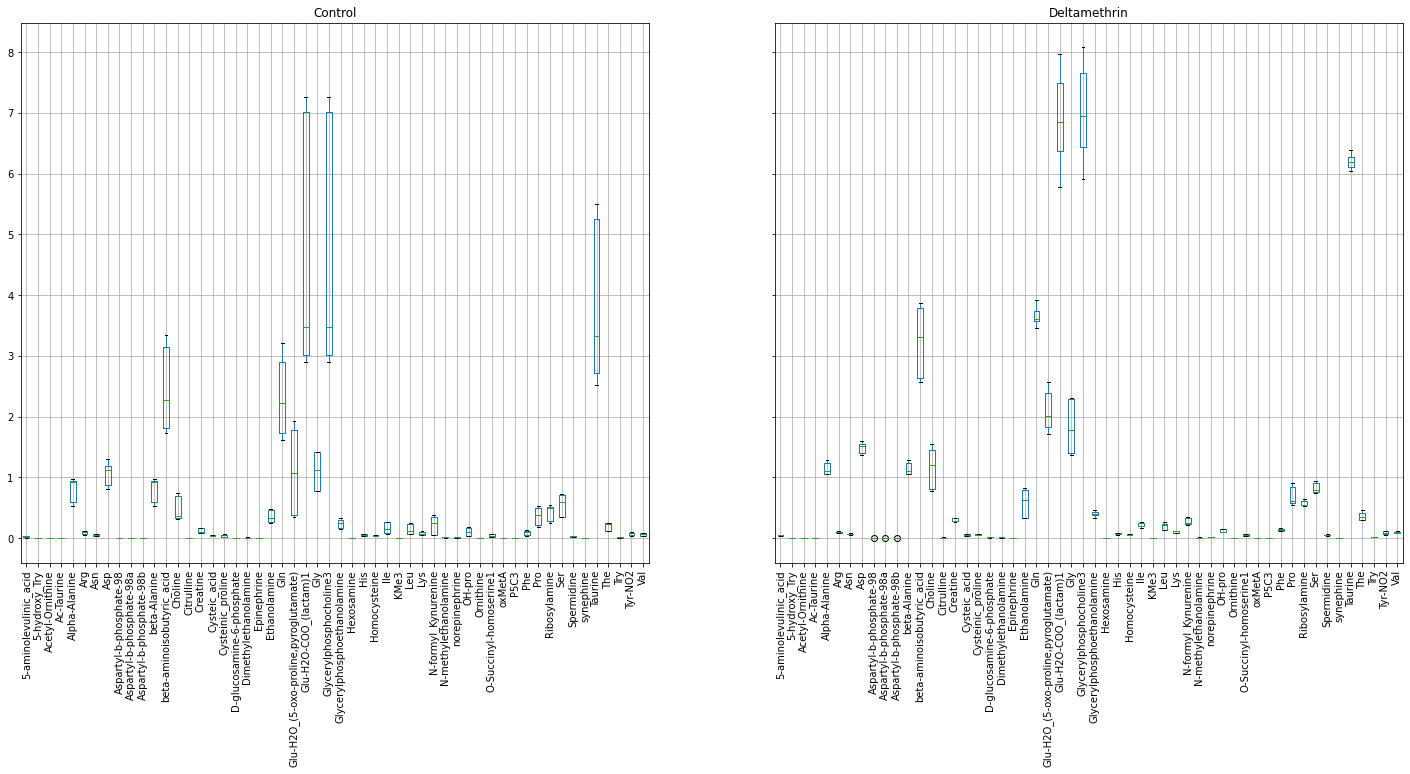

In [244]:
df_transpose_temp.groupby('Control/Treated').boxplot(rot=90,figsize=(24,10))

In [347]:
list_columns = df_transpose_temp.columns
list_columns

Index(['5-aminolevulinic_acid', '5-hydroxy_Try', 'Acetyl-Ornithine',
       'Ac-Taurine', 'Alpha-Alanine', 'Arg', 'Asn', 'Asp',
       'Aspartyl-b-phosphate-98', 'Aspartyl-b-phosphate-98a',
       'Aspartyl-b-phosphate-98b', 'beta-Alanine', 'beta-aminoisobutyric_acid',
       'Choline', 'Citrulline', 'Creatine', 'Cysteic_acid',
       'Cysteinic_proline', 'D-glucosamine-6-phosphate',
       'Dimethylethanolamine', 'Epinephrine', 'Ethanolamine', 'Gln',
       'Glu-H2O_(5-oxo-proline,pyroglutamate)', 'Glu-H2O-COO_(lactam)1', 'Gly',
       'Glycerylphosphocholine3', 'Glycerylphosphoethanolamine', 'Hexosamine',
       'His', 'Homocysteine', 'Ile', 'KMe3', 'Leu', 'Lys',
       'N-formyl_Kynurenine', 'N-methylethanolamine', 'norepinephrine',
       'OH-pro', 'Ornithine', 'O-Succinyl-homoserine1', 'oxMetA', 'P5C3',
       'Phe', 'Pro', 'Ribosylamine', 'Ser', 'Spermidine', 'synephine',
       'Taurine', 'The', 'Try', 'Tyr-NO2', 'Val'],
      dtype='object')

In [386]:
len(list_columns)

54

In [348]:
df2 = pd.melt(df_transpose_temp.reset_index(), id_vars='Control/Treated',value_vars=list_columns)
df2.iloc[1:20]

,Control/Treated,variable,value
1,Control,5-aminolevulinic_acid,0.027517
2,Control,5-aminolevulinic_acid,0.040215
3,Control,5-aminolevulinic_acid,0.042181
4,Control,5-aminolevulinic_acid,0.023696
5,Control,5-aminolevulinic_acid,0.022276
6,Control,5-aminolevulinic_acid,0.010290
7,Control,5-aminolevulinic_acid,0.021757
8,Control,5-aminolevulinic_acid,0.028780
9,Control,5-aminolevulinic_acid,0.029748
10,Control,5-aminolevulinic_acid,0.027700


[]

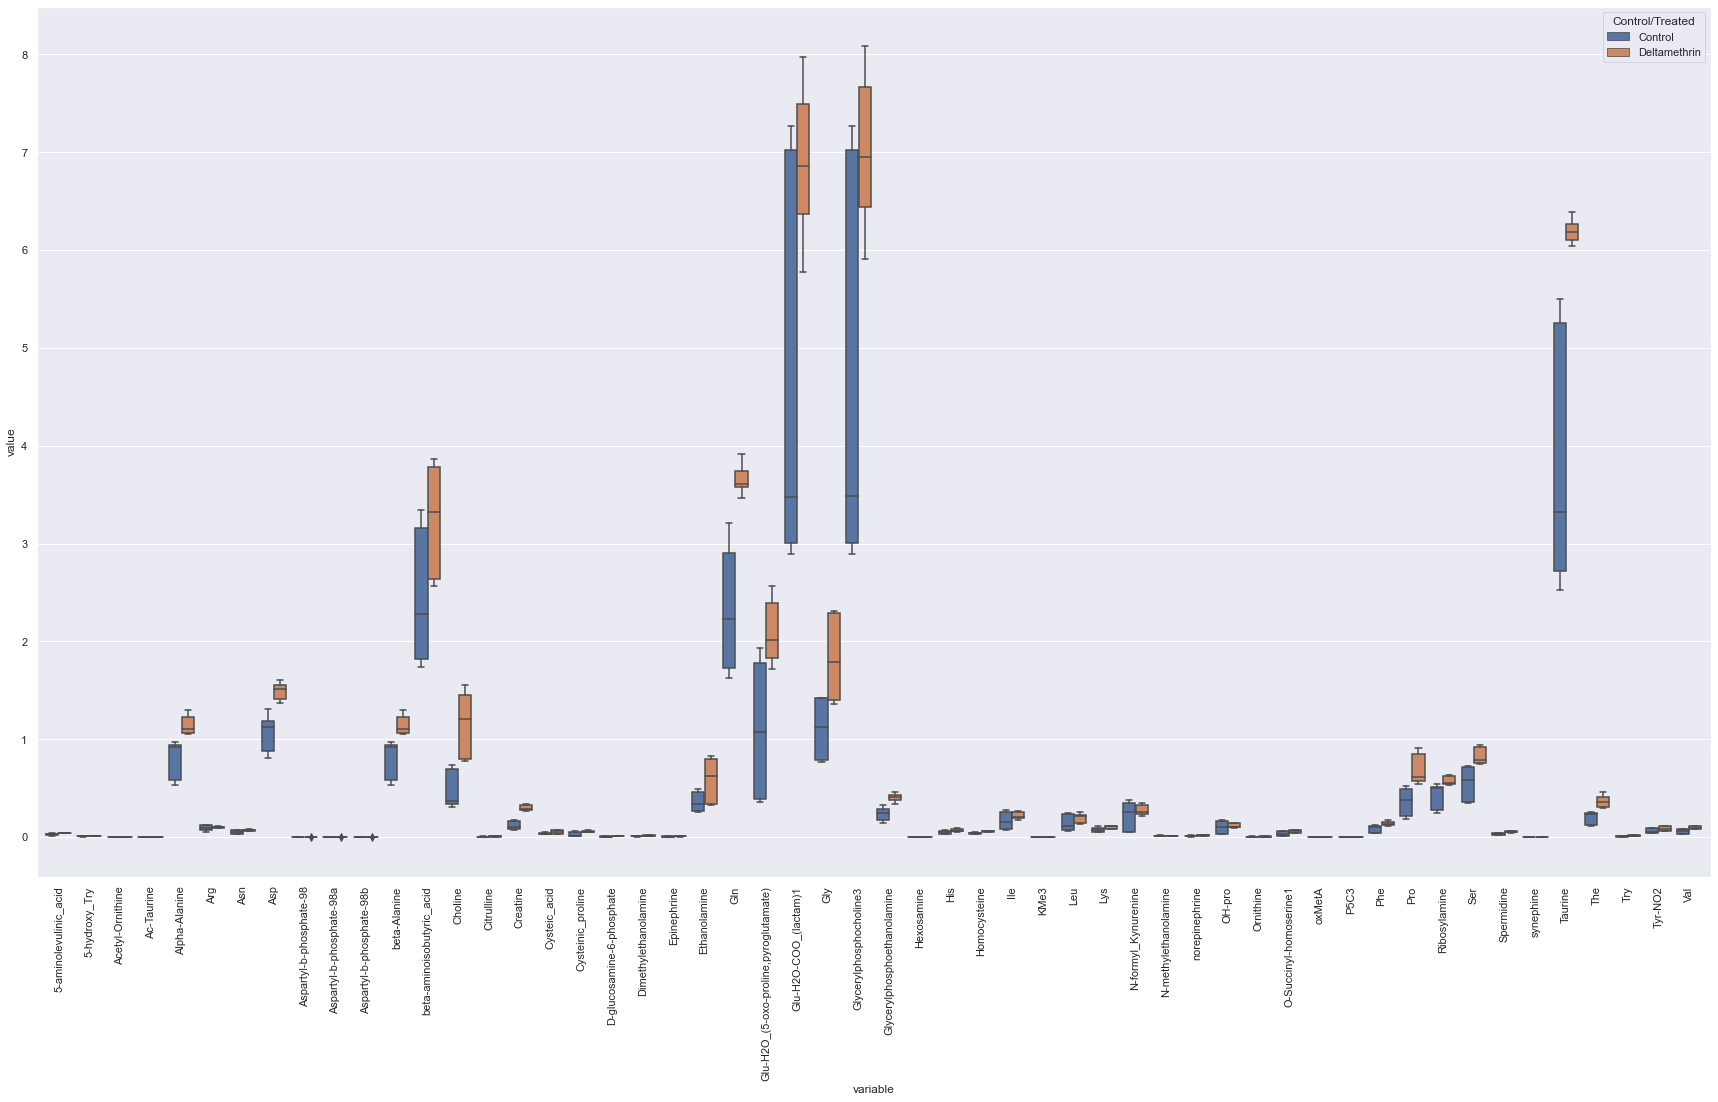

In [349]:
sns.set(rc={"figure.figsize":(30, 16)})
plot = sns.boxplot(x='variable',y='value',hue='Control/Treated',data=df2)
plt.setp(plot.get_xticklabels(), rotation=90)
plot.plot()

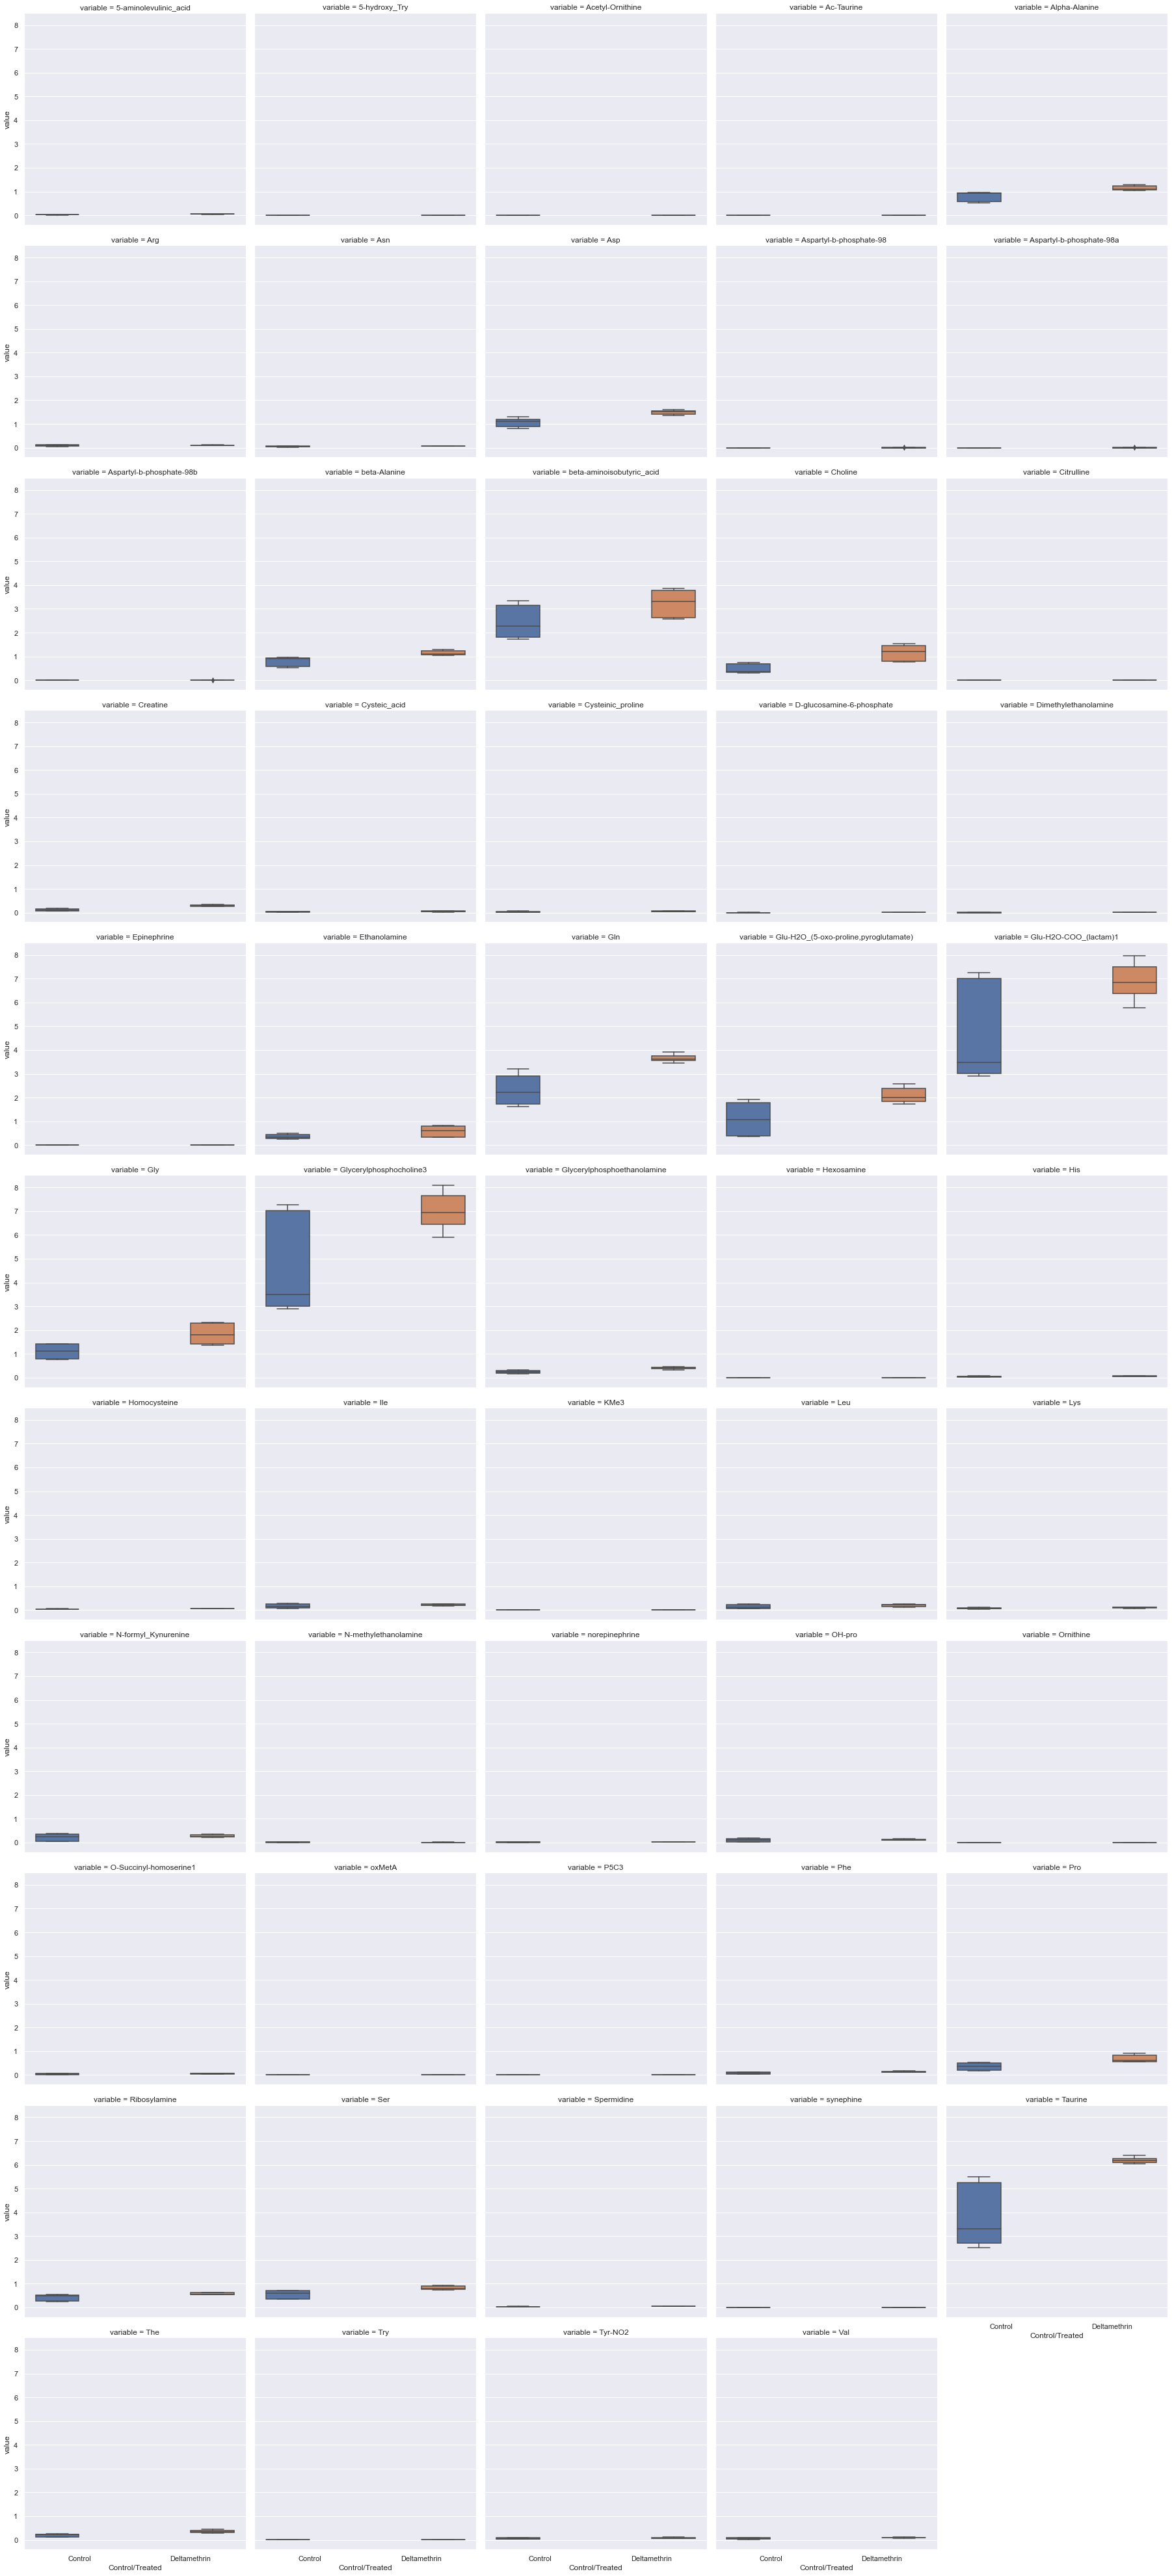

In [350]:
plot = sns.catplot(x="Control/Treated", y="value",

                hue="Control/Treated", col="variable",

                data=df2, kind="box", col_wrap=5,

                height=5);

In [400]:
### We make the Shapiro test for normality for each column 

shapiro_normality_test_results = {}
for col in df_transpose_temp.columns:
    shapiro_normality_test_results[col] = stats.shapiro(df_transpose_temp.loc[(slice(None),'Control',slice(None)),col])

In [378]:
df_transpose_temp.loc[(slice(None),'Control',slice(None)),'5-aminolevulinic_acid']

Subject                                   Control/Treated  Measurements_types              
#4 PND 3D Striatum C20Female F2S Control  Control          Measured [metabolites/ IS] Ratio    0.040117
                                                           Measured [metabolites/ IS] Ratio    0.027517
                                                           Measured [metabolites/ IS] Ratio    0.040215
                                                           Measured [metabolites/ IS] Ratio    0.042181
#5 PND 3D Striatum C21FemaleF2S Control   Control          Measured [metabolites/ IS] Ratio    0.023696
                                                           Measured [metabolites/ IS] Ratio    0.022276
                                                           Measured [metabolites/ IS] Ratio    0.010290
                                                           Measured [metabolites/ IS] Ratio    0.021757
#6 PND 3D Striatum C11FemaleF2S Control   Control          Measured [metabol

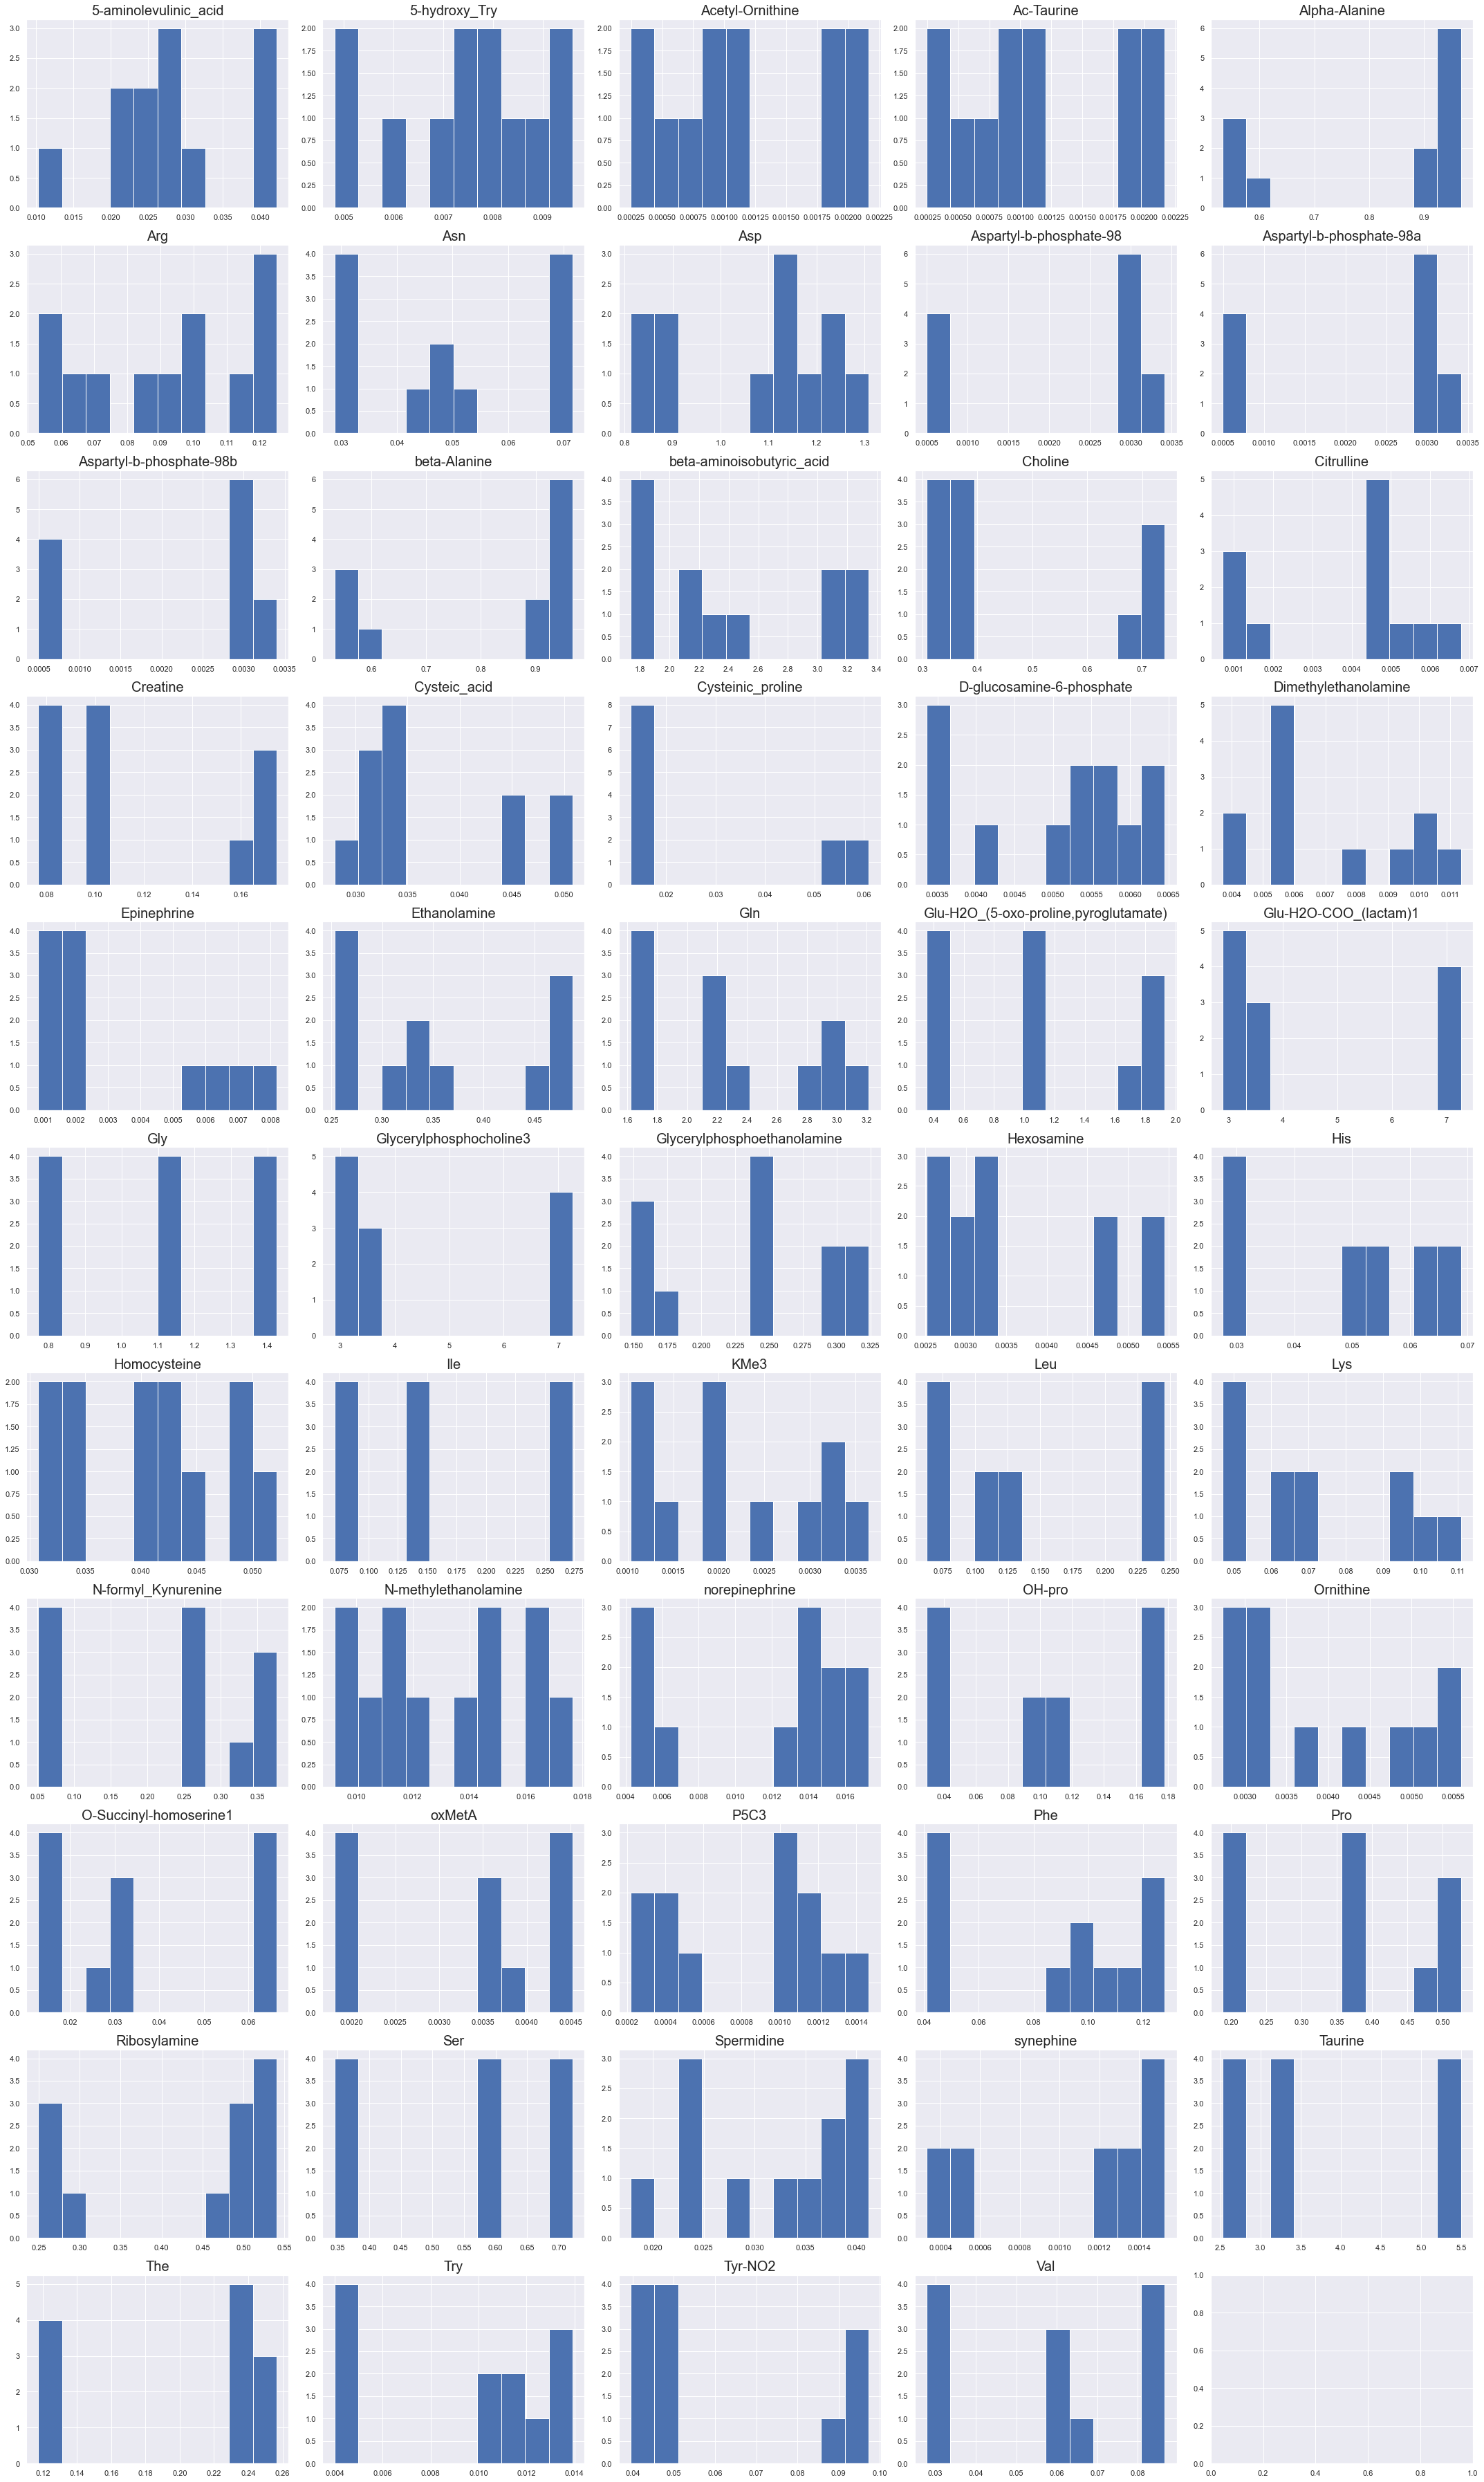

In [411]:
import math
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(df_transpose_temp.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(30, 50))
for col in df_transpose_temp.columns:
    df_transpose_temp.loc[(slice(None),'Control',slice(None)),col].hist(ax = axs[i,j])
    axs[i][j].set_title(col, fontsize=20)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
fig.tight_layout()
plt.show()

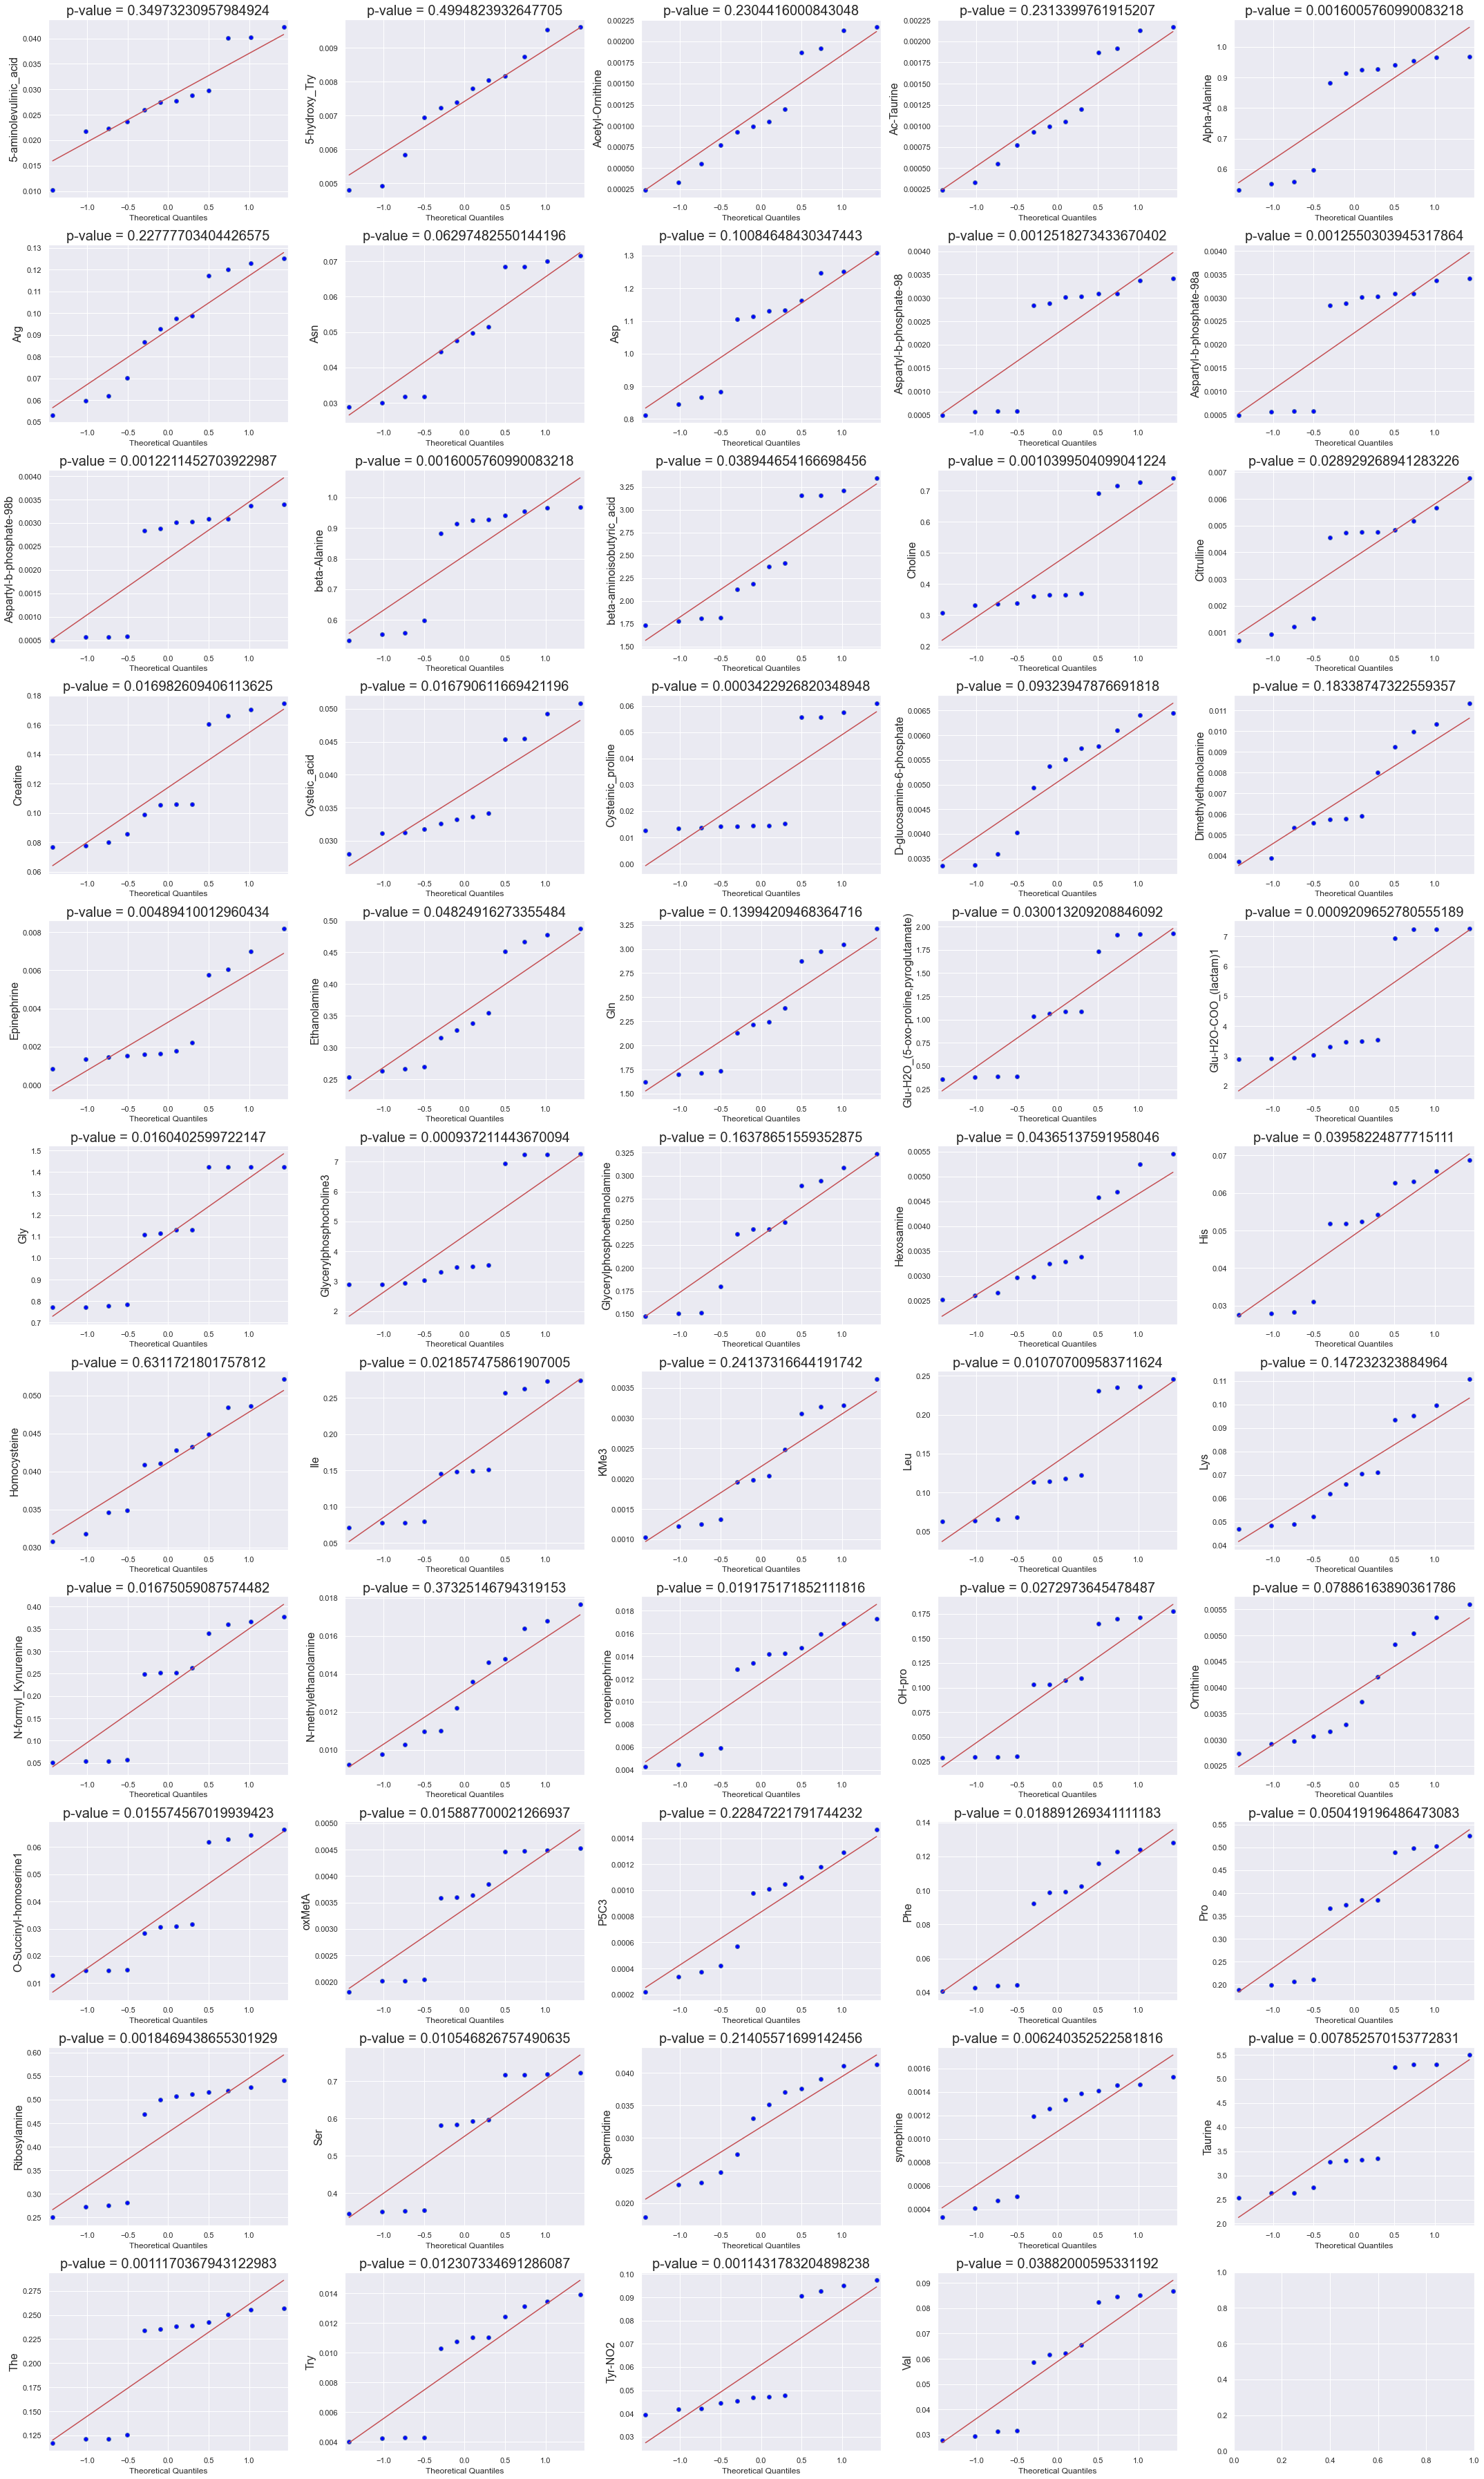

In [408]:
import math
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(df_transpose_temp.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(30, 50))
for col in df_transpose_temp.columns:
    sm.qqplot(df_transpose_temp.loc[(slice(None),'Control',slice(None)),col], line='s', ax = axs[i, j])
    axs[i][j].set_ylabel(col, fontsize=16)
    axs[i][j].set_title('p-value = ' + str(shapiro_normality_test_results[col].pvalue), fontsize=20)
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
fig.tight_layout()
plt.show()

In [413]:
ttest_ind(df_transpose_temp.loc[(slice(None),'Control',slice(None)),'5-aminolevulinic_acid'], df_transpose_temp.loc[(slice(None),'Deltamethrin',slice(None)),'5-aminolevulinic_acid'], equal_var=False)

Ttest_indResult(statistic=-5.966479024297366, pvalue=7.878216745006238e-05)

In [419]:
ttest_results = {}
for col in df_transpose_temp.columns:
    ttest_results[col] = ttest_ind(df_transpose_temp.loc[(slice(None),'Control',slice(None)),col], df_transpose_temp.loc[(slice(None),'Deltamethrin',slice(None)),col], equal_var=False)
print(ttest_results)    

{'5-aminolevulinic_acid': Ttest_indResult(statistic=-5.966479024297366, pvalue=7.878216745006238e-05), '5-hydroxy_Try': Ttest_indResult(statistic=-0.06415707478106507, pvalue=0.9495711546339781), 'Acetyl-Ornithine': Ttest_indResult(statistic=-8.96977180988832, pvalue=1.3060016197195126e-08), 'Ac-Taurine': Ttest_indResult(statistic=-8.966416332688215, pvalue=1.3078822113857458e-08), 'Alpha-Alanine': Ttest_indResult(statistic=-5.488700593875073, pvalue=4.604359066327897e-05), 'Arg': Ttest_indResult(statistic=-0.8483268487940282, pvalue=0.410233228451206), 'Asn': Ttest_indResult(statistic=-3.8078036039775274, pvalue=0.0020445393053608613), 'Asp': Ttest_indResult(statistic=-7.547381460465686, pvalue=1.2453592935984976e-06), 'Aspartyl-b-phosphate-98': Ttest_indResult(statistic=-3.2812844038589124, pvalue=0.004855794717166598), 'Aspartyl-b-phosphate-98a': Ttest_indResult(statistic=-3.2791496819084966, pvalue=0.004881255445918126), 'Aspartyl-b-phosphate-98b': Ttest_indResult(statistic=-3.2709

In [426]:
for k,v in ttest_results:
    print('Metabolite: {0} || t-test -> p-value: {1}\n'.format(k,v.pvalue))

ValueError: too many values to unpack (expected 2)

In [453]:
df3 = pd.melt(df_transpose_temp.reset_index(), id_vars=['Subject','Control/Treated'],value_vars=list_columns)
df3.rename(columns={'Control/Treated':'Treated'}, inplace=True)
enc = OrdinalEncoder()
enc.fit(df3[["Subject","Treated"]])
df3[["Subject","Treated"]] = enc.transform(df3[["Subject","Treated"]])
df3.iloc[1:24]

,Subject,Treated,variable,value
1,3.0,0.0,5-aminolevulinic_acid,0.027517
2,3.0,0.0,5-aminolevulinic_acid,0.040215
3,3.0,0.0,5-aminolevulinic_acid,0.042181
4,4.0,0.0,5-aminolevulinic_acid,0.023696
5,4.0,0.0,5-aminolevulinic_acid,0.022276
6,4.0,0.0,5-aminolevulinic_acid,0.010290
7,4.0,0.0,5-aminolevulinic_acid,0.021757
8,5.0,0.0,5-aminolevulinic_acid,0.028780
9,5.0,0.0,5-aminolevulinic_acid,0.029748
10,5.0,0.0,5-aminolevulinic_acid,0.027700


In [450]:
df3.iloc[0:24,3] = np.random.rand(24)
df3.iloc[:24]

,Subject,Treated,variable,value
0,3.0,0.0,5-aminolevulinic_acid,0.679270
1,3.0,0.0,5-aminolevulinic_acid,0.426175
2,3.0,0.0,5-aminolevulinic_acid,0.947482
3,3.0,0.0,5-aminolevulinic_acid,0.806643
4,4.0,0.0,5-aminolevulinic_acid,0.916805
5,4.0,0.0,5-aminolevulinic_acid,0.255308
6,4.0,0.0,5-aminolevulinic_acid,0.697120
7,4.0,0.0,5-aminolevulinic_acid,0.438558
8,5.0,0.0,5-aminolevulinic_acid,0.681164
9,5.0,0.0,5-aminolevulinic_acid,0.091942


In [454]:
# Inter
model = ols('value ~ C(Subject) + C(Treated)', data=df3.iloc[:24,:]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Subject),0.001035,5.0,13.819078,1.246357e-05
C(Treated),0.001816,1.0,121.209326,1.993452e-09
Residual,0.000270,18.0,NaN,NaN


In [455]:
model = ols('value ~ C(Treated)', data=df3.iloc[:24,:]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Treated),0.001500,1.0,35.598872,0.000005
Residual,0.000927,22.0,NaN,NaN


In [459]:
df3 = pd.melt(df_transpose_temp.reset_index(), id_vars=['Subject','Control/Treated'],value_vars=list_columns)
df3.rename(columns={'Control/Treated':'Treated'}, inplace=True)
df3

#perform Kolmogorov-Smirnov test
ks_2samp(df3[df3['Treated']=='Control']['value'], df3[df3['Treated']=='Deltamethrin']['value'])

KstestResult(statistic=0.10648148148148148, pvalue=0.0012781724634408516)

Let's try the Kruskall-Wallis

In [461]:
stats.kruskal(df3[df3['Treated']=='Control']['value'], df3[df3['Treated']=='Deltamethrin']['value'])

KruskalResult(statistic=12.013375997101715, pvalue=0.0005282009278743565)